# Perfil de presion dependiente del radio, por ley de Darcy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

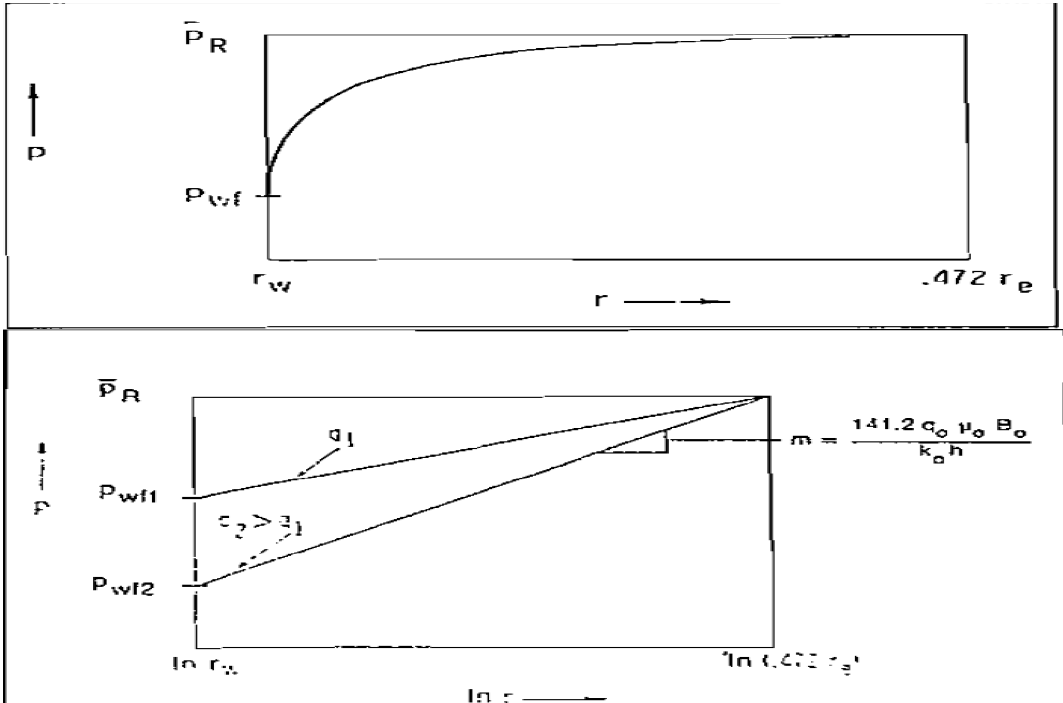

In [2]:
# agregamos los datos del modelo

re = 3000
rwf = 0.5
pwf = 1500
h = 60
k = 150
q = 200
mu = 15
B = 1

#generamos una variacion del radio

r = np.linspace(rwf,re,500)

In [3]:
# generamos datos de presion

pressure = []
for i in range(len(r)):
    p = pwf + (141.2*q*mu*B*(np.log(r[i]/rwf))/k/h)
    pressure.append(p)

## Graficamos el perfil de presion

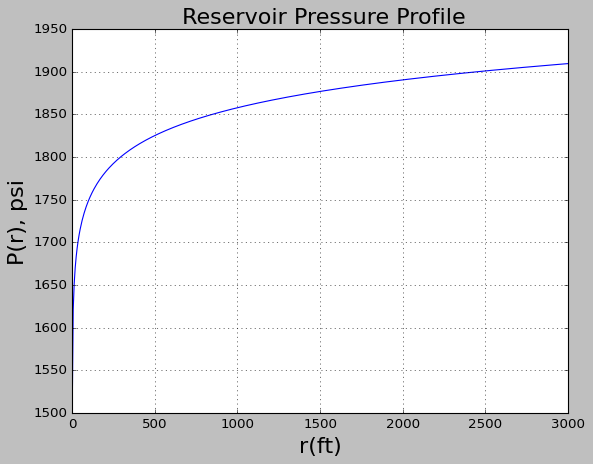

In [4]:
plt.style.use("classic")
plt.figure(figsize=[8,6])
plt.plot(r,pressure)
plt.xlabel('r(ft)',size = 20)
plt.ylabel('P(r), psi',size = 20)
plt.title(' Reservoir Pressure Profile',size = 20)
plt.grid(True)

### Si todo esto lo integramos en una funcion

In [5]:
def pressureprof():
    re = float(input('Outer radius of Reservoir(ft): '))
    rw = float(input('We4llbore Radius(ft): '))
    Pwf = float(input('Bottomhole Pressure(PSI): '))
    h = float(input('Net Pay Thickness(ft): '))
    k = float(input('Average Reservoir Permeability(mD): '))
    q = float(input('Flowrate(STB/Day): '))
    mu = float(input('Oil Viscosity: '))
    B = 1
    r = np.linspace(rw,re,500)
    Pressure = []
    for i in range(len(r)):
        P = Pwf + (141.2*q*mu*B*(np.log(r[i]/rw))/k/h)
        Pressure.append(P)
    plt.figure(figsize = [8,6])
    plt.plot(r,Pressure)
    plt.xlabel('r(ft)')
    plt.ylabel('P(r), Psi')
    plt.title('Reservoir Pressure Profile')
    plt.grid(True)

Outer radius of Reservoir(ft): 495
We4llbore Radius(ft): 0.75
Bottomhole Pressure(PSI): 1100
Net Pay Thickness(ft): 6.5
Average Reservoir Permeability(mD): 10
Flowrate(STB/Day): 100
Oil Viscosity: 12


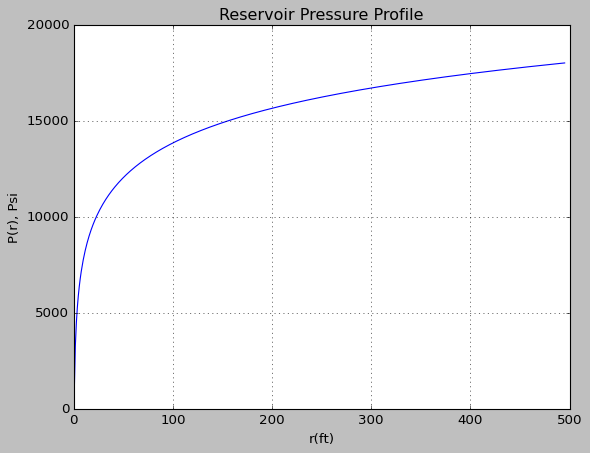

In [6]:
pressureprof()

## Realizamos lo mismo pero mas dinamico

In [7]:

from ipywidgets import interact, interactive
from IPython.display import display

In [8]:
def flowprofile(k,mu,q):
    
    re = 3000
    rw = 0.5
    
    pe = 4000
    B =1
    h = 30
    r = np.linspace(rw,re,500)
    
    P = pe - (141.2*q*mu*B*(np.log(re/r))/k/h)
    
    y_min = P[np.where(r ==rw)]
    
    plt.figure(figsize = (9,6))
    plt.plot(r,P,linewidth = 4)
    plt.axhline(y_min,linewidth =3, color ='red')
    
    plt.ylim(0,5000)
    
    plt.xlabel('r(ft)')
    
    plt.ylabel('P(r),psi')
    
    plt.title('Dynamic Pressure Profile')
    
    plt.grid(True)
    
    return r,P

In [11]:
w  = interactive(flowprofile,k = (1,1000),mu = (10,220), q = (100,200))

In [12]:
display(w)

interactive(children=(IntSlider(value=500, description='k', max=1000, min=1), IntSlider(value=115, description…